In [68]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import  set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [69]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 +'housing/housing.data',
                   header = None, delim_whitespace = True, names = names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222.0,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311.0,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311.0,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311.0,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311.0,15.2,386.71,17.10,18.9


In [70]:
df.shape

(506, 14)

In [71]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [72]:
#Display max,min,mean and quartiles in the dataset
set_option('precision', 1)
print(df.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PRTATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [73]:
#Compute pairwise correlation of columns
set_option('precision', 2)
print(df.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PRTATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

From the result above, we can see that some certain features have strong correlations (>0.7 or <-0.7). 
Pearson correlation between NOX and INDUS is 0.76
between DIS and INDUS is -0.71。
between TAX and INDUS is 0.72。
between AGE and NOX is 0.73。
between DIS and NOX is -0.77

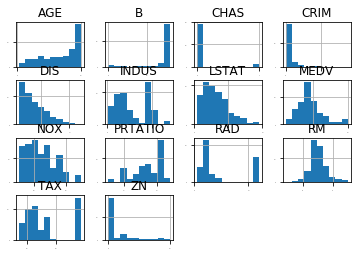

In [74]:
#histogram
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

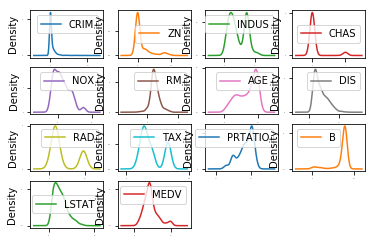

In [75]:
#density
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)
pyplot.show()

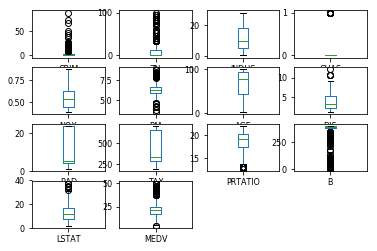

In [76]:
#box plot
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

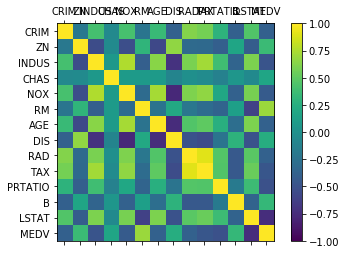

In [77]:
#correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [78]:
#separating the dataset
array = df.values
X = array[:, 0:13]
Y = array[:, 13]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [79]:
#Evaluation criteria
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [80]:
#I don't know which model has the best performance. So I'll test each one
#evaluation baseline
models = {}
models['LR'] = LinearRegression()
models['LASSO'] = Lasso()
models['EN'] = ElasticNet()
models['KNN']  = KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()


In [81]:
#evaluation
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))


KNN: -41.896488 (13.901688)
SVM: -85.518342 (31.994798)
CART: -24.266176 (11.712690)
LR: -21.379856 (9.414264)
EN: -27.502259 (12.305022)
LASSO: -26.423561 (11.651110)


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\75439\Anaconda3\envs\t

Linear regression now has the best performance

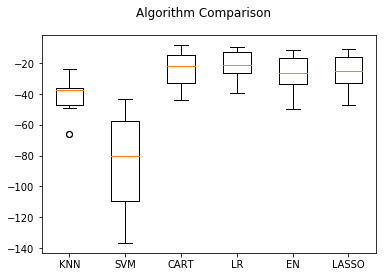

In [82]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In the original dataset, different features use different units of measurement. So we need to normalize the data and then reevaluate these algorithms. Here I use pipeline to normorlize the data and do estimation. 

In [83]:
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])
pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])
pipelines['ScalerEN'] = Pipeline([('Scaler', 
StandardScaler()), ('EN', ElasticNet())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', 
StandardScaler()), ('KNN', KNeighborsRegressor())])
pipelines['ScalerCART'] = Pipeline([('Scaler', 
StandardScaler()), ('CART', DecisionTreeRegressor())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', 
StandardScaler()), ('SVM', SVR())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScalerLR: -21.379856 (9.414264)
ScalerKNN: -20.107620 (12.376949)
ScalerSVM: -29.633086 (17.009186)
ScalerCART: -24.005113 (8.757671)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)


Now KNN has the best performace, according to the results above

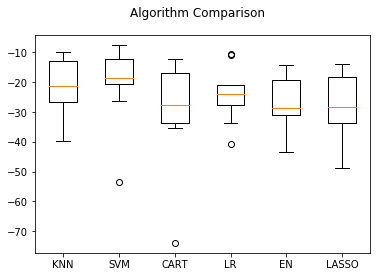

In [84]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

The default n_neighbor for KNN is 5, here I tried different numbers of n_neighbor to find the best one to optimizize the KNN algorithm.

In [85]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, 
param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('Optimization：%s uses%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

Optimization：-18.172136963696367 uses{'n_neighbors': 3}
-20.208663 (15.029652) with {'n_neighbors': 1}
-18.172137 (12.950570) with {'n_neighbors': 3}
-20.131163 (12.203697) with {'n_neighbors': 5}
-20.575845 (12.345886) with {'n_neighbors': 7}
-20.368264 (11.621738) with {'n_neighbors': 9}
-21.009204 (11.610012) with {'n_neighbors': 11}
-21.151809 (11.943318) with {'n_neighbors': 13}
-21.557400 (11.536339) with {'n_neighbors': 15}
-22.789938 (11.566861) with {'n_neighbors': 17}
-23.871873 (11.340389) with {'n_neighbors': 19}
-24.361362 (11.914786) with {'n_neighbors': 21}


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best n_neighbor here is 3. 

# Next I use ensemble learning to further improve the results.
Bagging: Random Forest, ETR
Boosting: Adaboost, GBM

In [92]:
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler',StandardScaler()), ('AB', AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', 
StandardScaler()), ('ABKNN', AdaBoostRegressor
(base_estimator= KNeighborsRegressor(n_neighbors=3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler', 
StandardScaler()), ('ABLR',
AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', 
StandardScaler()), ('RFR', RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', 
StandardScaler()), ('ETR', ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', 
StandardScaler()), ('RBR', GradientBoostingRegressor())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB-LR: -23.916730 (8.319301)
ScaledAB-KNN: -15.419940 (9.731075)
ScaledRFR: -14.216651 (7.118897)


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\754

ScaledGBR: -10.025010 (4.414524)
ScaledAB: -15.083233 (6.437224)


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\754

ScaledETR: -9.687479 (5.984886)


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The performance has been greatly improved according to the results above. 

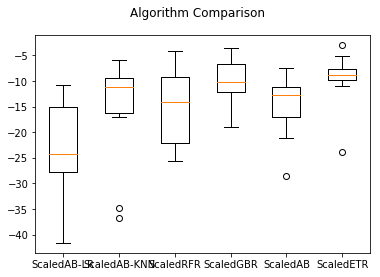

In [87]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

GBM and ETR have relatively larger Median and better distribution. 

Note that there is a n_estimators parameter. Changing this parameter may lead to more precise results.  

In [91]:
#optimizing GMB by trying different n_estimators
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, 
param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('Optimization：%s uses%s' % (grid_result.best_score_,grid_result.best_params_))


#optimizing ET by trying different n_estimators
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('Optimization：%s uses%s' % (grid_result.best_score_, grid_result.best_params_))

C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Optimization：-9.2662383016668 uses{'n_estimators': 600}
Optimization：-8.682608085808583 uses{'n_estimators': 30}


C:\Users\75439\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Next I'll use ETR to generate the model

In [89]:
#train model
caler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
gbr = ExtraTreesRegressor(n_estimators=80)
gbr.fit(X=rescaledX, y=Y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [90]:
#model evaluation
rescaledX_validation = scaler.transform(X_validation)
predictions = gbr.predict(rescaledX_validation)
print(mean_squared_error(Y_validation, predictions))

14.485786795343135
